# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

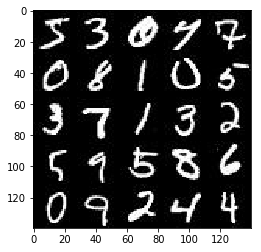

In [3]:
show_n_images = 25
import pickle as pkl
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

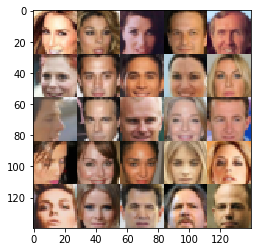

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.9.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [22]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    learning_rate = tf.placeholder(tf.float32, None, name='LearningRate')
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, shape=(None, z_dim), name='input_z')
    
    
    
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [23]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        #28x28xdim
        x1 = tf.layers.conv2d(images, 64, 4, 2, activation=None, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x11 = tf.layers.batch_normalization(x1, training=True)
        x111 = tf.nn.leaky_relu(x11, alpha=0.2)
        #14x14x64
        
        x2 = tf.layers.conv2d(x111, 128, 4 , 2, activation=None, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x22 = tf.layers.batch_normalization(x2, training = True)
        x222 = tf.nn.leaky_relu(x22, alpha=0.2)
        #7x7x128
        
        x3 = tf.layers.conv2d(x222, 256, 4 , 2, activation=None, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x33 = tf.layers.batch_normalization(x3, training = True)
        x333 = tf.nn.leaky_relu(x33, alpha=0.2)
        
        flat = tf.layers.flatten(x333)
        logits = tf.layers.dense(flat, 1, activation= None)
        
        out = tf.sigmoid(logits)
        
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [24]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse= not is_train):
        x1 = tf.layers.dense(z, 12544)
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.nn.leaky_relu(x1, alpha=0.2)
        #4*4*256

        x2 = tf.layers.conv2d_transpose(x1, 128, 4, 2, padding='same', activation=None, kernel_initializer=tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.nn.leaky_relu(x2, alpha=0.2)
        #14x14x128


        x3 = tf.layers.conv2d_transpose(x2, 64, 4, 2, padding='same', activation=None, kernel_initializer=tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.nn.leaky_relu(x3, alpha=0.2)
        #28x28x64
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 1, 1, padding='same', activation=None, kernel_initializer=tf.contrib.layers.xavier_initializer())
        #2828xout_channel_dim
        out = tf.tanh(logits)
        
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [17]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [18]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    
    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [20]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    samples, losses = [], []
    steps = 0
    print_every = 10
    show_every  = 100
    inputs_real, inputs_z, learning_ratee = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    
    d_loss, g_loss = model_loss(inputs_real, inputs_z, data_shape[3])
    
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_train_opt, feed_dict={inputs_real: batch_images*2, inputs_z: batch_z, learning_ratee: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={inputs_z: batch_z, inputs_real: batch_images*2, learning_ratee: learning_rate})
                
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({inputs_z: batch_z, inputs_real: batch_images*2})
                    train_loss_g = g_loss.eval({inputs_z: batch_z, inputs_real: batch_images*2})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 25, inputs_z, data_shape[3], data_image_mode)
                    
        saver.save(sess, './checkpoints/generator.ckpt')
        
    with open('samples.pkl', 'wb') as f:
        pkl.dump(samples, f)
                
    
    return losses, samples
                

In [21]:
mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
print(mnist_dataset.shape)

(60000, 28, 28, 1)


### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.0319... Generator Loss: 6.7384
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 9.8066
Epoch 1/2... Discriminator Loss: 0.1974... Generator Loss: 3.7302
Epoch 1/2... Discriminator Loss: 5.2809... Generator Loss: 0.0584
Epoch 1/2... Discriminator Loss: 0.8822... Generator Loss: 1.1045
Epoch 1/2... Discriminator Loss: 0.8840... Generator Loss: 1.0387
Epoch 1/2... Discriminator Loss: 0.8245... Generator Loss: 1.0183
Epoch 1/2... Discriminator Loss: 0.3721... Generator Loss: 2.1929
Epoch 1/2... Discriminator Loss: 0.6596... Generator Loss: 1.8551
Epoch 1/2... Discriminator Loss: 1.0365... Generator Loss: 2.5961


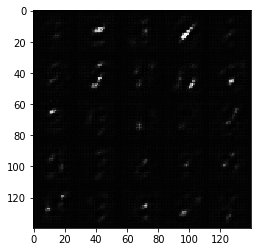

Epoch 1/2... Discriminator Loss: 1.5855... Generator Loss: 0.4194
Epoch 1/2... Discriminator Loss: 0.8373... Generator Loss: 1.4539
Epoch 1/2... Discriminator Loss: 1.3613... Generator Loss: 1.6231
Epoch 1/2... Discriminator Loss: 1.1116... Generator Loss: 3.3208
Epoch 1/2... Discriminator Loss: 0.7598... Generator Loss: 2.2496
Epoch 1/2... Discriminator Loss: 1.3681... Generator Loss: 0.5931
Epoch 1/2... Discriminator Loss: 0.6327... Generator Loss: 1.4114
Epoch 1/2... Discriminator Loss: 0.8004... Generator Loss: 1.2413
Epoch 1/2... Discriminator Loss: 1.0385... Generator Loss: 0.6029
Epoch 1/2... Discriminator Loss: 0.6824... Generator Loss: 1.9162


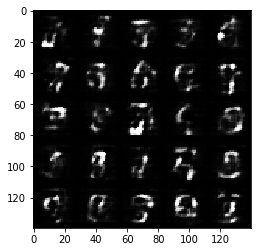

Epoch 1/2... Discriminator Loss: 0.6574... Generator Loss: 1.4582
Epoch 1/2... Discriminator Loss: 0.6735... Generator Loss: 1.8911
Epoch 1/2... Discriminator Loss: 0.8013... Generator Loss: 1.2628
Epoch 1/2... Discriminator Loss: 0.7978... Generator Loss: 1.1829
Epoch 1/2... Discriminator Loss: 1.3803... Generator Loss: 0.4599
Epoch 1/2... Discriminator Loss: 0.5481... Generator Loss: 2.1368
Epoch 1/2... Discriminator Loss: 0.6954... Generator Loss: 1.3377
Epoch 1/2... Discriminator Loss: 1.2080... Generator Loss: 0.5008
Epoch 1/2... Discriminator Loss: 1.5181... Generator Loss: 0.4004
Epoch 1/2... Discriminator Loss: 0.6534... Generator Loss: 1.1316


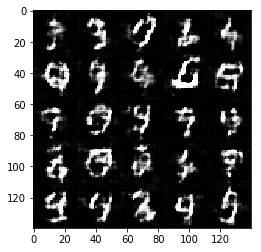

Epoch 1/2... Discriminator Loss: 0.9071... Generator Loss: 3.2958
Epoch 1/2... Discriminator Loss: 1.0442... Generator Loss: 0.6993
Epoch 1/2... Discriminator Loss: 0.9599... Generator Loss: 2.2296
Epoch 1/2... Discriminator Loss: 0.8369... Generator Loss: 1.0382
Epoch 1/2... Discriminator Loss: 1.0980... Generator Loss: 3.3399
Epoch 1/2... Discriminator Loss: 0.6159... Generator Loss: 1.4904
Epoch 1/2... Discriminator Loss: 1.0955... Generator Loss: 0.7220
Epoch 1/2... Discriminator Loss: 0.8046... Generator Loss: 0.9219
Epoch 1/2... Discriminator Loss: 0.8790... Generator Loss: 1.6306
Epoch 1/2... Discriminator Loss: 1.4778... Generator Loss: 0.3970


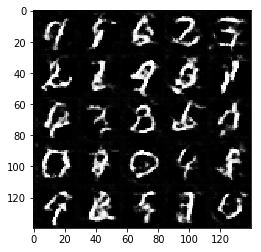

Epoch 1/2... Discriminator Loss: 0.6701... Generator Loss: 1.4446
Epoch 1/2... Discriminator Loss: 0.6011... Generator Loss: 2.4686
Epoch 1/2... Discriminator Loss: 1.0516... Generator Loss: 0.7055
Epoch 1/2... Discriminator Loss: 0.6529... Generator Loss: 1.1735
Epoch 1/2... Discriminator Loss: 0.4943... Generator Loss: 2.5839
Epoch 1/2... Discriminator Loss: 1.2907... Generator Loss: 0.5581
Epoch 1/2... Discriminator Loss: 0.7578... Generator Loss: 1.5474
Epoch 1/2... Discriminator Loss: 0.8789... Generator Loss: 1.0120
Epoch 1/2... Discriminator Loss: 1.3100... Generator Loss: 2.4063
Epoch 1/2... Discriminator Loss: 0.8097... Generator Loss: 0.9089


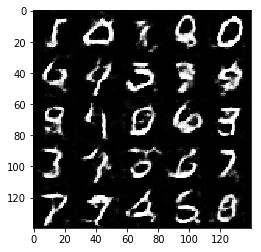

Epoch 1/2... Discriminator Loss: 0.9045... Generator Loss: 0.9585
Epoch 1/2... Discriminator Loss: 0.7186... Generator Loss: 1.6842
Epoch 1/2... Discriminator Loss: 1.1943... Generator Loss: 2.9437
Epoch 1/2... Discriminator Loss: 0.6704... Generator Loss: 1.1592
Epoch 1/2... Discriminator Loss: 0.7312... Generator Loss: 2.0773
Epoch 1/2... Discriminator Loss: 1.0345... Generator Loss: 1.1765
Epoch 1/2... Discriminator Loss: 0.9741... Generator Loss: 0.8946
Epoch 1/2... Discriminator Loss: 0.8251... Generator Loss: 1.0134
Epoch 1/2... Discriminator Loss: 0.6934... Generator Loss: 1.0699
Epoch 1/2... Discriminator Loss: 0.6854... Generator Loss: 1.5842


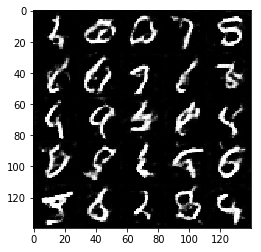

Epoch 1/2... Discriminator Loss: 0.9593... Generator Loss: 1.0830
Epoch 1/2... Discriminator Loss: 0.7742... Generator Loss: 1.3012
Epoch 1/2... Discriminator Loss: 0.8850... Generator Loss: 0.8436
Epoch 1/2... Discriminator Loss: 0.6709... Generator Loss: 1.1002
Epoch 1/2... Discriminator Loss: 0.7312... Generator Loss: 1.0329
Epoch 1/2... Discriminator Loss: 1.0372... Generator Loss: 0.5890
Epoch 1/2... Discriminator Loss: 1.4861... Generator Loss: 0.3860
Epoch 1/2... Discriminator Loss: 1.6565... Generator Loss: 0.3108
Epoch 1/2... Discriminator Loss: 0.7514... Generator Loss: 1.0417
Epoch 1/2... Discriminator Loss: 1.2636... Generator Loss: 0.4537


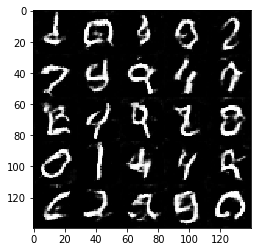

Epoch 1/2... Discriminator Loss: 2.5698... Generator Loss: 0.1305
Epoch 1/2... Discriminator Loss: 1.0728... Generator Loss: 0.7557
Epoch 1/2... Discriminator Loss: 0.8124... Generator Loss: 0.8570
Epoch 1/2... Discriminator Loss: 1.0538... Generator Loss: 1.7664
Epoch 1/2... Discriminator Loss: 0.8613... Generator Loss: 1.3708
Epoch 1/2... Discriminator Loss: 0.6703... Generator Loss: 1.6228
Epoch 1/2... Discriminator Loss: 1.2852... Generator Loss: 0.4549
Epoch 1/2... Discriminator Loss: 0.9610... Generator Loss: 2.6412
Epoch 1/2... Discriminator Loss: 0.6254... Generator Loss: 1.5543
Epoch 1/2... Discriminator Loss: 1.2492... Generator Loss: 0.8928


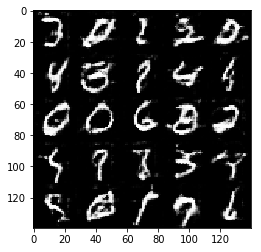

Epoch 1/2... Discriminator Loss: 0.7549... Generator Loss: 1.1880
Epoch 1/2... Discriminator Loss: 1.3579... Generator Loss: 2.7258
Epoch 1/2... Discriminator Loss: 0.6863... Generator Loss: 1.0440
Epoch 1/2... Discriminator Loss: 0.5583... Generator Loss: 1.2429
Epoch 1/2... Discriminator Loss: 0.4126... Generator Loss: 2.2706
Epoch 1/2... Discriminator Loss: 0.8103... Generator Loss: 1.4109
Epoch 1/2... Discriminator Loss: 1.1741... Generator Loss: 0.9699
Epoch 1/2... Discriminator Loss: 0.9347... Generator Loss: 0.9425
Epoch 1/2... Discriminator Loss: 0.9622... Generator Loss: 1.0171
Epoch 1/2... Discriminator Loss: 0.8188... Generator Loss: 0.9895


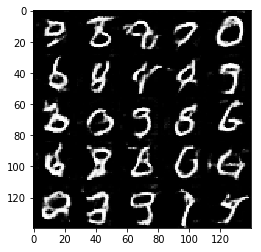

Epoch 1/2... Discriminator Loss: 0.9664... Generator Loss: 0.7291
Epoch 1/2... Discriminator Loss: 0.6281... Generator Loss: 1.1809
Epoch 1/2... Discriminator Loss: 0.6983... Generator Loss: 1.1113
Epoch 2/2... Discriminator Loss: 0.9270... Generator Loss: 0.8115
Epoch 2/2... Discriminator Loss: 0.6545... Generator Loss: 1.5075
Epoch 2/2... Discriminator Loss: 0.9432... Generator Loss: 0.7600
Epoch 2/2... Discriminator Loss: 0.7788... Generator Loss: 1.3183
Epoch 2/2... Discriminator Loss: 1.1560... Generator Loss: 0.5289
Epoch 2/2... Discriminator Loss: 0.6960... Generator Loss: 2.3148
Epoch 2/2... Discriminator Loss: 0.8454... Generator Loss: 1.1263


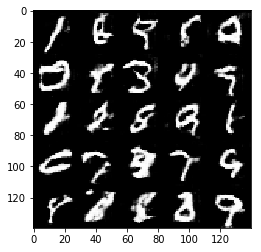

Epoch 2/2... Discriminator Loss: 0.6245... Generator Loss: 1.5867
Epoch 2/2... Discriminator Loss: 1.0028... Generator Loss: 2.0466
Epoch 2/2... Discriminator Loss: 0.7235... Generator Loss: 1.0814
Epoch 2/2... Discriminator Loss: 1.0032... Generator Loss: 0.6639
Epoch 2/2... Discriminator Loss: 0.8155... Generator Loss: 0.8149
Epoch 2/2... Discriminator Loss: 0.4871... Generator Loss: 1.5318
Epoch 2/2... Discriminator Loss: 0.7505... Generator Loss: 1.5449
Epoch 2/2... Discriminator Loss: 0.7845... Generator Loss: 1.1064
Epoch 2/2... Discriminator Loss: 0.8059... Generator Loss: 0.9380
Epoch 2/2... Discriminator Loss: 0.6171... Generator Loss: 1.2311


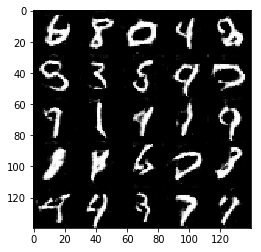

Epoch 2/2... Discriminator Loss: 0.6667... Generator Loss: 1.2156
Epoch 2/2... Discriminator Loss: 0.4343... Generator Loss: 1.6635
Epoch 2/2... Discriminator Loss: 0.3787... Generator Loss: 1.6186
Epoch 2/2... Discriminator Loss: 0.6762... Generator Loss: 1.2075
Epoch 2/2... Discriminator Loss: 1.1251... Generator Loss: 0.6251
Epoch 2/2... Discriminator Loss: 1.6699... Generator Loss: 0.3821
Epoch 2/2... Discriminator Loss: 1.1847... Generator Loss: 0.6454
Epoch 2/2... Discriminator Loss: 0.9730... Generator Loss: 0.6675
Epoch 2/2... Discriminator Loss: 1.3878... Generator Loss: 0.4758
Epoch 2/2... Discriminator Loss: 0.7410... Generator Loss: 1.6718


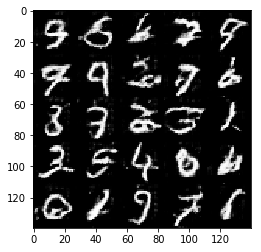

Epoch 2/2... Discriminator Loss: 0.6103... Generator Loss: 1.2825
Epoch 2/2... Discriminator Loss: 0.5793... Generator Loss: 1.4382
Epoch 2/2... Discriminator Loss: 0.7279... Generator Loss: 1.1229
Epoch 2/2... Discriminator Loss: 0.5100... Generator Loss: 1.7250
Epoch 2/2... Discriminator Loss: 0.7182... Generator Loss: 3.1672
Epoch 2/2... Discriminator Loss: 1.1945... Generator Loss: 0.6553
Epoch 2/2... Discriminator Loss: 1.7196... Generator Loss: 0.3395
Epoch 2/2... Discriminator Loss: 1.0501... Generator Loss: 0.7429
Epoch 2/2... Discriminator Loss: 0.5793... Generator Loss: 1.5320
Epoch 2/2... Discriminator Loss: 0.8777... Generator Loss: 2.6255


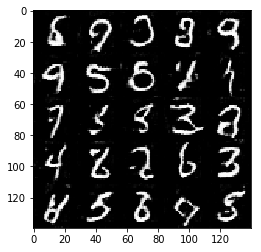

Epoch 2/2... Discriminator Loss: 0.7158... Generator Loss: 0.9267
Epoch 2/2... Discriminator Loss: 1.3762... Generator Loss: 2.2185
Epoch 2/2... Discriminator Loss: 0.6625... Generator Loss: 3.1382
Epoch 2/2... Discriminator Loss: 0.7285... Generator Loss: 1.9796
Epoch 2/2... Discriminator Loss: 0.8206... Generator Loss: 0.8721
Epoch 2/2... Discriminator Loss: 0.7038... Generator Loss: 1.0617
Epoch 2/2... Discriminator Loss: 0.9835... Generator Loss: 0.7500
Epoch 2/2... Discriminator Loss: 0.5760... Generator Loss: 1.2515
Epoch 2/2... Discriminator Loss: 0.5102... Generator Loss: 1.7775
Epoch 2/2... Discriminator Loss: 1.6278... Generator Loss: 0.3648


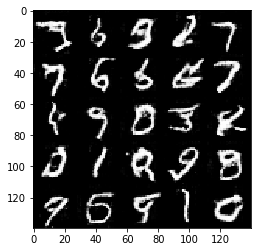

Epoch 2/2... Discriminator Loss: 0.9888... Generator Loss: 0.7722
Epoch 2/2... Discriminator Loss: 0.5464... Generator Loss: 2.4044
Epoch 2/2... Discriminator Loss: 0.9087... Generator Loss: 0.8057
Epoch 2/2... Discriminator Loss: 0.5460... Generator Loss: 1.4257
Epoch 2/2... Discriminator Loss: 0.6775... Generator Loss: 1.1262
Epoch 2/2... Discriminator Loss: 0.5998... Generator Loss: 1.2088
Epoch 2/2... Discriminator Loss: 0.6951... Generator Loss: 1.3620
Epoch 2/2... Discriminator Loss: 0.8194... Generator Loss: 0.9283
Epoch 2/2... Discriminator Loss: 0.5616... Generator Loss: 1.9619
Epoch 2/2... Discriminator Loss: 0.6082... Generator Loss: 1.2703


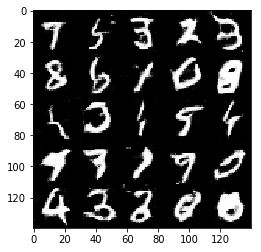

Epoch 2/2... Discriminator Loss: 0.5009... Generator Loss: 1.7668
Epoch 2/2... Discriminator Loss: 0.5078... Generator Loss: 1.5722
Epoch 2/2... Discriminator Loss: 0.7405... Generator Loss: 0.9993
Epoch 2/2... Discriminator Loss: 0.8245... Generator Loss: 0.8415
Epoch 2/2... Discriminator Loss: 1.0301... Generator Loss: 0.7452
Epoch 2/2... Discriminator Loss: 0.8718... Generator Loss: 2.1522
Epoch 2/2... Discriminator Loss: 0.7152... Generator Loss: 1.1790
Epoch 2/2... Discriminator Loss: 0.9693... Generator Loss: 0.7603
Epoch 2/2... Discriminator Loss: 0.8083... Generator Loss: 0.9644
Epoch 2/2... Discriminator Loss: 0.5928... Generator Loss: 2.4005


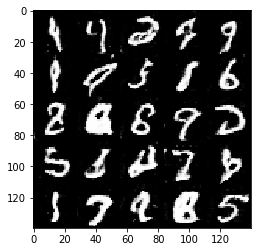

Epoch 2/2... Discriminator Loss: 0.9543... Generator Loss: 0.7920
Epoch 2/2... Discriminator Loss: 1.3363... Generator Loss: 0.4503
Epoch 2/2... Discriminator Loss: 0.8453... Generator Loss: 0.8384
Epoch 2/2... Discriminator Loss: 0.9257... Generator Loss: 0.9946
Epoch 2/2... Discriminator Loss: 1.2460... Generator Loss: 0.5782
Epoch 2/2... Discriminator Loss: 0.7012... Generator Loss: 1.1434
Epoch 2/2... Discriminator Loss: 0.3670... Generator Loss: 2.1989
Epoch 2/2... Discriminator Loss: 0.6707... Generator Loss: 1.1441
Epoch 2/2... Discriminator Loss: 0.6514... Generator Loss: 1.1185
Epoch 2/2... Discriminator Loss: 1.7068... Generator Loss: 0.3976


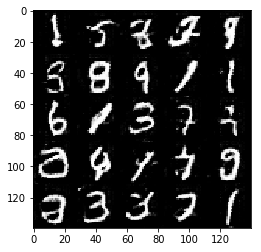

Epoch 2/2... Discriminator Loss: 1.1000... Generator Loss: 0.8030
Epoch 2/2... Discriminator Loss: 0.5805... Generator Loss: 1.3689
Epoch 2/2... Discriminator Loss: 0.9010... Generator Loss: 0.7975
Epoch 2/2... Discriminator Loss: 0.7184... Generator Loss: 1.1256
Epoch 2/2... Discriminator Loss: 0.7420... Generator Loss: 0.9546
Epoch 2/2... Discriminator Loss: 0.3485... Generator Loss: 1.5992
Epoch 2/2... Discriminator Loss: 0.6195... Generator Loss: 1.3032
Epoch 2/2... Discriminator Loss: 0.5759... Generator Loss: 2.3536
Epoch 2/2... Discriminator Loss: 1.2124... Generator Loss: 4.4913
Epoch 2/2... Discriminator Loss: 0.9371... Generator Loss: 2.7924


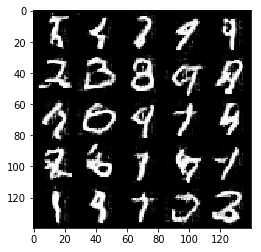

Epoch 2/2... Discriminator Loss: 0.9658... Generator Loss: 0.8712
Epoch 2/2... Discriminator Loss: 1.1553... Generator Loss: 0.7965
Epoch 2/2... Discriminator Loss: 0.5696... Generator Loss: 1.6412
Epoch 2/2... Discriminator Loss: 0.8208... Generator Loss: 2.1441
Epoch 2/2... Discriminator Loss: 0.6564... Generator Loss: 1.9279
Epoch 2/2... Discriminator Loss: 0.6219... Generator Loss: 1.1687
Epoch 2/2... Discriminator Loss: 0.4367... Generator Loss: 1.5688


In [28]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.6

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.9688... Generator Loss: 0.7303
Epoch 1/1... Discriminator Loss: 0.6913... Generator Loss: 1.0396
Epoch 1/1... Discriminator Loss: 0.4558... Generator Loss: 1.7313
Epoch 1/1... Discriminator Loss: 0.4794... Generator Loss: 1.2425
Epoch 1/1... Discriminator Loss: 0.3111... Generator Loss: 1.6423
Epoch 1/1... Discriminator Loss: 0.2424... Generator Loss: 1.9360
Epoch 1/1... Discriminator Loss: 0.2300... Generator Loss: 1.9594
Epoch 1/1... Discriminator Loss: 0.1019... Generator Loss: 2.8992
Epoch 1/1... Discriminator Loss: 0.1851... Generator Loss: 2.2105
Epoch 1/1... Discriminator Loss: 0.5531... Generator Loss: 3.5281


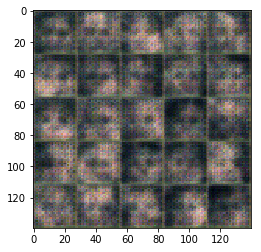

Epoch 1/1... Discriminator Loss: 2.2973... Generator Loss: 0.2195
Epoch 1/1... Discriminator Loss: 0.5058... Generator Loss: 2.4830
Epoch 1/1... Discriminator Loss: 0.3280... Generator Loss: 2.5046
Epoch 1/1... Discriminator Loss: 1.3093... Generator Loss: 0.4990
Epoch 1/1... Discriminator Loss: 0.6593... Generator Loss: 3.0331
Epoch 1/1... Discriminator Loss: 0.5884... Generator Loss: 1.8505
Epoch 1/1... Discriminator Loss: 1.0947... Generator Loss: 0.9592
Epoch 1/1... Discriminator Loss: 1.1032... Generator Loss: 2.4524
Epoch 1/1... Discriminator Loss: 0.8491... Generator Loss: 2.5962
Epoch 1/1... Discriminator Loss: 0.7226... Generator Loss: 2.0813


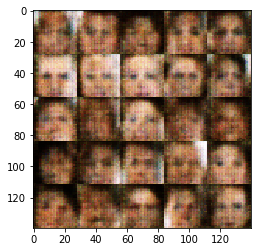

Epoch 1/1... Discriminator Loss: 1.1024... Generator Loss: 0.5965
Epoch 1/1... Discriminator Loss: 0.8493... Generator Loss: 1.3352
Epoch 1/1... Discriminator Loss: 1.3560... Generator Loss: 0.5906
Epoch 1/1... Discriminator Loss: 0.8739... Generator Loss: 0.9515
Epoch 1/1... Discriminator Loss: 1.0690... Generator Loss: 0.9019
Epoch 1/1... Discriminator Loss: 1.1295... Generator Loss: 0.7124
Epoch 1/1... Discriminator Loss: 1.0635... Generator Loss: 0.6755
Epoch 1/1... Discriminator Loss: 0.8177... Generator Loss: 1.2791
Epoch 1/1... Discriminator Loss: 1.0831... Generator Loss: 1.0995
Epoch 1/1... Discriminator Loss: 0.6878... Generator Loss: 1.3540


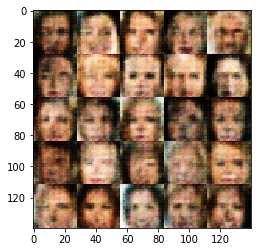

Epoch 1/1... Discriminator Loss: 0.8985... Generator Loss: 1.9246
Epoch 1/1... Discriminator Loss: 0.8251... Generator Loss: 0.9848
Epoch 1/1... Discriminator Loss: 0.6193... Generator Loss: 1.3165
Epoch 1/1... Discriminator Loss: 0.7525... Generator Loss: 2.3863
Epoch 1/1... Discriminator Loss: 0.7677... Generator Loss: 1.4978
Epoch 1/1... Discriminator Loss: 0.8644... Generator Loss: 0.8685
Epoch 1/1... Discriminator Loss: 0.5671... Generator Loss: 1.4946
Epoch 1/1... Discriminator Loss: 0.9160... Generator Loss: 0.8278
Epoch 1/1... Discriminator Loss: 1.1150... Generator Loss: 0.6655
Epoch 1/1... Discriminator Loss: 0.4970... Generator Loss: 1.3753


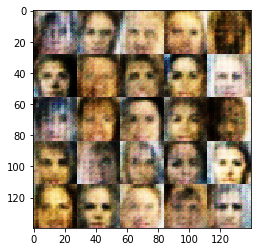

Epoch 1/1... Discriminator Loss: 0.8470... Generator Loss: 1.0223
Epoch 1/1... Discriminator Loss: 0.6689... Generator Loss: 1.1525
Epoch 1/1... Discriminator Loss: 0.9850... Generator Loss: 0.6665
Epoch 1/1... Discriminator Loss: 0.6873... Generator Loss: 1.4554
Epoch 1/1... Discriminator Loss: 0.5912... Generator Loss: 1.1612
Epoch 1/1... Discriminator Loss: 0.9687... Generator Loss: 0.6351
Epoch 1/1... Discriminator Loss: 0.3495... Generator Loss: 2.4133
Epoch 1/1... Discriminator Loss: 0.7882... Generator Loss: 1.2855
Epoch 1/1... Discriminator Loss: 1.0043... Generator Loss: 0.8117
Epoch 1/1... Discriminator Loss: 0.6261... Generator Loss: 1.2459


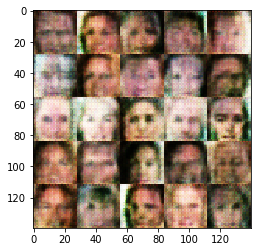

Epoch 1/1... Discriminator Loss: 0.5832... Generator Loss: 1.3486
Epoch 1/1... Discriminator Loss: 1.5158... Generator Loss: 0.5178
Epoch 1/1... Discriminator Loss: 0.8496... Generator Loss: 0.9887
Epoch 1/1... Discriminator Loss: 0.8251... Generator Loss: 0.8683
Epoch 1/1... Discriminator Loss: 0.9984... Generator Loss: 0.9827
Epoch 1/1... Discriminator Loss: 1.3843... Generator Loss: 0.4580
Epoch 1/1... Discriminator Loss: 0.8990... Generator Loss: 1.1413
Epoch 1/1... Discriminator Loss: 0.8166... Generator Loss: 1.2371
Epoch 1/1... Discriminator Loss: 1.3818... Generator Loss: 1.0550
Epoch 1/1... Discriminator Loss: 1.0310... Generator Loss: 0.7279


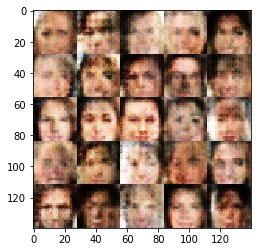

Epoch 1/1... Discriminator Loss: 1.6008... Generator Loss: 0.3645
Epoch 1/1... Discriminator Loss: 0.7958... Generator Loss: 1.2732
Epoch 1/1... Discriminator Loss: 0.9670... Generator Loss: 1.0588
Epoch 1/1... Discriminator Loss: 0.9683... Generator Loss: 0.9399
Epoch 1/1... Discriminator Loss: 0.8539... Generator Loss: 1.4176
Epoch 1/1... Discriminator Loss: 1.1929... Generator Loss: 0.7302
Epoch 1/1... Discriminator Loss: 0.9715... Generator Loss: 1.0605
Epoch 1/1... Discriminator Loss: 1.2853... Generator Loss: 0.6186
Epoch 1/1... Discriminator Loss: 0.9616... Generator Loss: 1.4678
Epoch 1/1... Discriminator Loss: 1.2275... Generator Loss: 1.3725


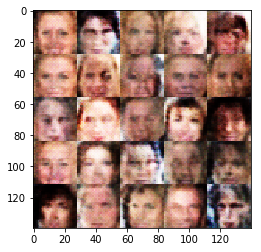

Epoch 1/1... Discriminator Loss: 1.1071... Generator Loss: 0.8441
Epoch 1/1... Discriminator Loss: 0.9426... Generator Loss: 0.9606
Epoch 1/1... Discriminator Loss: 1.3948... Generator Loss: 1.0604
Epoch 1/1... Discriminator Loss: 1.1616... Generator Loss: 0.6702
Epoch 1/1... Discriminator Loss: 1.0678... Generator Loss: 0.9503
Epoch 1/1... Discriminator Loss: 1.1898... Generator Loss: 0.6928
Epoch 1/1... Discriminator Loss: 1.2008... Generator Loss: 0.9790
Epoch 1/1... Discriminator Loss: 1.3685... Generator Loss: 0.8061
Epoch 1/1... Discriminator Loss: 1.1342... Generator Loss: 0.8695
Epoch 1/1... Discriminator Loss: 1.1469... Generator Loss: 0.8279


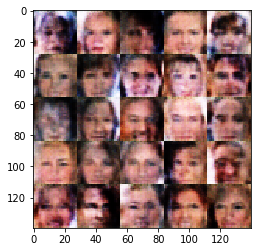

Epoch 1/1... Discriminator Loss: 1.2186... Generator Loss: 0.5855
Epoch 1/1... Discriminator Loss: 1.3634... Generator Loss: 0.4310
Epoch 1/1... Discriminator Loss: 0.9407... Generator Loss: 0.9821
Epoch 1/1... Discriminator Loss: 1.0159... Generator Loss: 0.9068
Epoch 1/1... Discriminator Loss: 1.2477... Generator Loss: 1.3859
Epoch 1/1... Discriminator Loss: 1.1739... Generator Loss: 1.0311
Epoch 1/1... Discriminator Loss: 1.0707... Generator Loss: 0.7067
Epoch 1/1... Discriminator Loss: 1.0945... Generator Loss: 0.7316
Epoch 1/1... Discriminator Loss: 0.8549... Generator Loss: 1.2736
Epoch 1/1... Discriminator Loss: 1.1451... Generator Loss: 0.9357


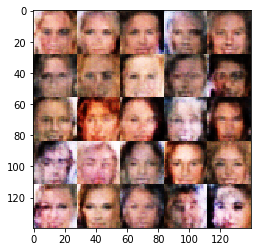

Epoch 1/1... Discriminator Loss: 1.0079... Generator Loss: 0.9695
Epoch 1/1... Discriminator Loss: 1.2348... Generator Loss: 0.6103
Epoch 1/1... Discriminator Loss: 1.2027... Generator Loss: 0.5859
Epoch 1/1... Discriminator Loss: 0.9789... Generator Loss: 1.0620
Epoch 1/1... Discriminator Loss: 1.1009... Generator Loss: 1.0407
Epoch 1/1... Discriminator Loss: 1.1135... Generator Loss: 0.7149
Epoch 1/1... Discriminator Loss: 0.9317... Generator Loss: 1.0607
Epoch 1/1... Discriminator Loss: 0.9251... Generator Loss: 1.3466
Epoch 1/1... Discriminator Loss: 1.0922... Generator Loss: 0.9616
Epoch 1/1... Discriminator Loss: 0.9580... Generator Loss: 0.7848


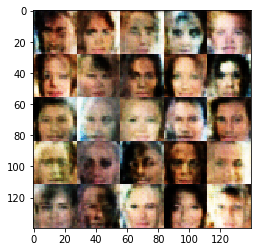

Epoch 1/1... Discriminator Loss: 0.8762... Generator Loss: 1.1542
Epoch 1/1... Discriminator Loss: 1.1348... Generator Loss: 0.8394
Epoch 1/1... Discriminator Loss: 0.9144... Generator Loss: 1.1142
Epoch 1/1... Discriminator Loss: 0.9210... Generator Loss: 1.1246
Epoch 1/1... Discriminator Loss: 0.9205... Generator Loss: 0.9927
Epoch 1/1... Discriminator Loss: 0.9488... Generator Loss: 0.8883
Epoch 1/1... Discriminator Loss: 0.7993... Generator Loss: 1.2189
Epoch 1/1... Discriminator Loss: 1.0109... Generator Loss: 0.7943
Epoch 1/1... Discriminator Loss: 1.1231... Generator Loss: 0.8429
Epoch 1/1... Discriminator Loss: 1.1362... Generator Loss: 0.6426


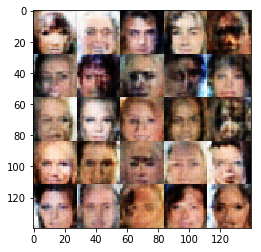

Epoch 1/1... Discriminator Loss: 1.0148... Generator Loss: 1.0555
Epoch 1/1... Discriminator Loss: 1.0886... Generator Loss: 0.6320
Epoch 1/1... Discriminator Loss: 1.1077... Generator Loss: 1.4331
Epoch 1/1... Discriminator Loss: 1.1620... Generator Loss: 0.6888
Epoch 1/1... Discriminator Loss: 1.1180... Generator Loss: 0.7255
Epoch 1/1... Discriminator Loss: 1.0813... Generator Loss: 0.8828
Epoch 1/1... Discriminator Loss: 1.2084... Generator Loss: 0.4715
Epoch 1/1... Discriminator Loss: 0.9886... Generator Loss: 0.8755
Epoch 1/1... Discriminator Loss: 0.9546... Generator Loss: 0.8813
Epoch 1/1... Discriminator Loss: 0.9393... Generator Loss: 0.9857


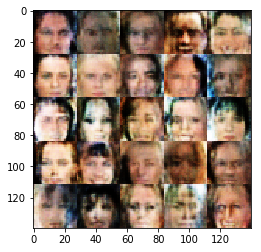

Epoch 1/1... Discriminator Loss: 0.7168... Generator Loss: 1.4692
Epoch 1/1... Discriminator Loss: 0.9742... Generator Loss: 1.1711
Epoch 1/1... Discriminator Loss: 0.8870... Generator Loss: 0.9208
Epoch 1/1... Discriminator Loss: 1.1241... Generator Loss: 1.2065
Epoch 1/1... Discriminator Loss: 1.0471... Generator Loss: 1.0639
Epoch 1/1... Discriminator Loss: 0.8750... Generator Loss: 1.9620
Epoch 1/1... Discriminator Loss: 0.8657... Generator Loss: 1.4613
Epoch 1/1... Discriminator Loss: 1.1053... Generator Loss: 0.6712
Epoch 1/1... Discriminator Loss: 0.9343... Generator Loss: 0.7129
Epoch 1/1... Discriminator Loss: 0.9877... Generator Loss: 0.7076


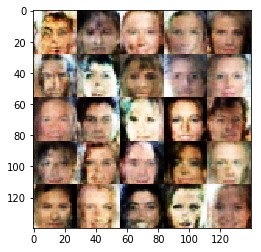

Epoch 1/1... Discriminator Loss: 1.0211... Generator Loss: 1.1373
Epoch 1/1... Discriminator Loss: 1.1647... Generator Loss: 0.6151
Epoch 1/1... Discriminator Loss: 0.7779... Generator Loss: 1.4019
Epoch 1/1... Discriminator Loss: 1.0958... Generator Loss: 0.9916
Epoch 1/1... Discriminator Loss: 0.9708... Generator Loss: 1.0042
Epoch 1/1... Discriminator Loss: 0.9391... Generator Loss: 0.9454
Epoch 1/1... Discriminator Loss: 0.9322... Generator Loss: 1.0796
Epoch 1/1... Discriminator Loss: 1.2192... Generator Loss: 0.5922
Epoch 1/1... Discriminator Loss: 1.5931... Generator Loss: 1.5172
Epoch 1/1... Discriminator Loss: 0.9720... Generator Loss: 0.6333


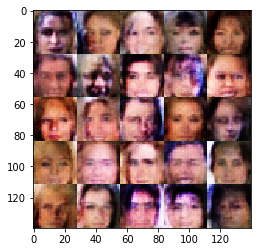

Epoch 1/1... Discriminator Loss: 0.7767... Generator Loss: 1.0816
Epoch 1/1... Discriminator Loss: 0.8238... Generator Loss: 1.2374
Epoch 1/1... Discriminator Loss: 0.8935... Generator Loss: 0.9483
Epoch 1/1... Discriminator Loss: 1.0313... Generator Loss: 1.0416
Epoch 1/1... Discriminator Loss: 1.3460... Generator Loss: 0.5825
Epoch 1/1... Discriminator Loss: 1.0164... Generator Loss: 0.7933
Epoch 1/1... Discriminator Loss: 0.8712... Generator Loss: 1.0239
Epoch 1/1... Discriminator Loss: 0.8578... Generator Loss: 0.8217
Epoch 1/1... Discriminator Loss: 0.7931... Generator Loss: 0.9576
Epoch 1/1... Discriminator Loss: 0.8142... Generator Loss: 0.7987


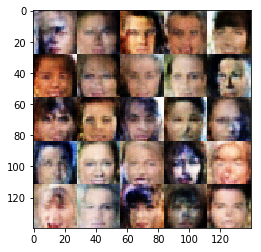

Epoch 1/1... Discriminator Loss: 1.2104... Generator Loss: 0.4948
Epoch 1/1... Discriminator Loss: 1.0003... Generator Loss: 0.9080
Epoch 1/1... Discriminator Loss: 0.7363... Generator Loss: 1.3530
Epoch 1/1... Discriminator Loss: 0.9357... Generator Loss: 0.6619
Epoch 1/1... Discriminator Loss: 0.8686... Generator Loss: 1.2644
Epoch 1/1... Discriminator Loss: 0.9613... Generator Loss: 0.7071
Epoch 1/1... Discriminator Loss: 0.8921... Generator Loss: 1.1583
Epoch 1/1... Discriminator Loss: 0.7691... Generator Loss: 1.3683
Epoch 1/1... Discriminator Loss: 0.9718... Generator Loss: 1.2416
Epoch 1/1... Discriminator Loss: 0.7817... Generator Loss: 0.8685


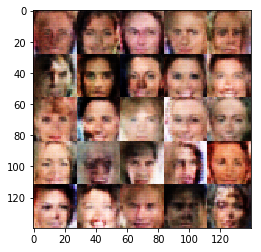

Epoch 1/1... Discriminator Loss: 1.1751... Generator Loss: 0.4972
Epoch 1/1... Discriminator Loss: 1.0108... Generator Loss: 1.0016
Epoch 1/1... Discriminator Loss: 0.7840... Generator Loss: 0.8903
Epoch 1/1... Discriminator Loss: 1.0123... Generator Loss: 1.0150
Epoch 1/1... Discriminator Loss: 0.6668... Generator Loss: 1.1150
Epoch 1/1... Discriminator Loss: 0.9442... Generator Loss: 0.6850
Epoch 1/1... Discriminator Loss: 0.9791... Generator Loss: 1.0718
Epoch 1/1... Discriminator Loss: 1.2806... Generator Loss: 0.5624
Epoch 1/1... Discriminator Loss: 0.9752... Generator Loss: 0.9218
Epoch 1/1... Discriminator Loss: 0.7658... Generator Loss: 1.0717


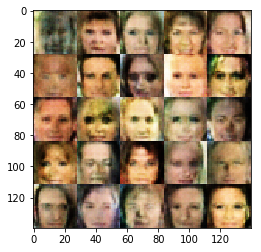

Epoch 1/1... Discriminator Loss: 0.6900... Generator Loss: 0.9265
Epoch 1/1... Discriminator Loss: 0.8869... Generator Loss: 0.7723
Epoch 1/1... Discriminator Loss: 0.6082... Generator Loss: 1.2335
Epoch 1/1... Discriminator Loss: 0.7961... Generator Loss: 1.0618
Epoch 1/1... Discriminator Loss: 0.7871... Generator Loss: 1.0406
Epoch 1/1... Discriminator Loss: 0.6088... Generator Loss: 1.3645
Epoch 1/1... Discriminator Loss: 0.9363... Generator Loss: 0.9187
Epoch 1/1... Discriminator Loss: 1.1159... Generator Loss: 0.5357
Epoch 1/1... Discriminator Loss: 1.2329... Generator Loss: 0.4685
Epoch 1/1... Discriminator Loss: 0.8732... Generator Loss: 0.9189


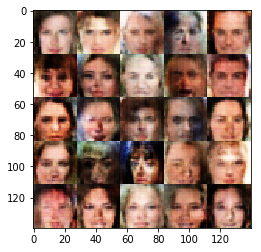

Epoch 1/1... Discriminator Loss: 0.9518... Generator Loss: 0.7489
Epoch 1/1... Discriminator Loss: 1.0635... Generator Loss: 1.2941
Epoch 1/1... Discriminator Loss: 1.1732... Generator Loss: 0.8371
Epoch 1/1... Discriminator Loss: 0.8162... Generator Loss: 1.0450
Epoch 1/1... Discriminator Loss: 1.1470... Generator Loss: 0.6565
Epoch 1/1... Discriminator Loss: 0.8452... Generator Loss: 0.8914
Epoch 1/1... Discriminator Loss: 1.1662... Generator Loss: 0.7140
Epoch 1/1... Discriminator Loss: 0.5421... Generator Loss: 1.5542
Epoch 1/1... Discriminator Loss: 1.3899... Generator Loss: 0.4095
Epoch 1/1... Discriminator Loss: 0.8700... Generator Loss: 0.9480


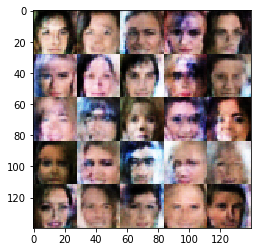

Epoch 1/1... Discriminator Loss: 0.8384... Generator Loss: 0.9432
Epoch 1/1... Discriminator Loss: 0.6548... Generator Loss: 1.4852
Epoch 1/1... Discriminator Loss: 1.2268... Generator Loss: 0.6600
Epoch 1/1... Discriminator Loss: 0.8296... Generator Loss: 1.0520
Epoch 1/1... Discriminator Loss: 0.7472... Generator Loss: 1.1825
Epoch 1/1... Discriminator Loss: 0.7574... Generator Loss: 0.9481
Epoch 1/1... Discriminator Loss: 0.5893... Generator Loss: 1.3116
Epoch 1/1... Discriminator Loss: 0.8634... Generator Loss: 1.0434
Epoch 1/1... Discriminator Loss: 0.8202... Generator Loss: 0.9253
Epoch 1/1... Discriminator Loss: 0.8285... Generator Loss: 1.5197


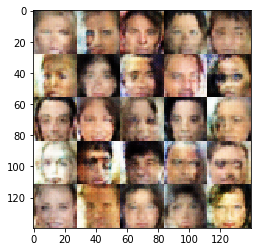

Epoch 1/1... Discriminator Loss: 0.9276... Generator Loss: 1.1661
Epoch 1/1... Discriminator Loss: 0.6995... Generator Loss: 1.2422
Epoch 1/1... Discriminator Loss: 1.3457... Generator Loss: 0.6149
Epoch 1/1... Discriminator Loss: 0.9279... Generator Loss: 1.9147
Epoch 1/1... Discriminator Loss: 1.4103... Generator Loss: 1.1520
Epoch 1/1... Discriminator Loss: 0.9548... Generator Loss: 1.0029
Epoch 1/1... Discriminator Loss: 0.6718... Generator Loss: 1.5532
Epoch 1/1... Discriminator Loss: 1.0127... Generator Loss: 0.6222
Epoch 1/1... Discriminator Loss: 1.0035... Generator Loss: 1.3797
Epoch 1/1... Discriminator Loss: 0.9850... Generator Loss: 0.7494


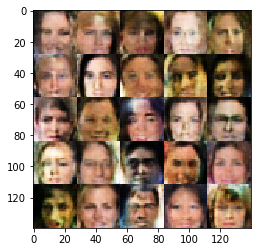

Epoch 1/1... Discriminator Loss: 0.7987... Generator Loss: 1.0840
Epoch 1/1... Discriminator Loss: 1.1211... Generator Loss: 0.7617
Epoch 1/1... Discriminator Loss: 0.9445... Generator Loss: 1.3865
Epoch 1/1... Discriminator Loss: 0.8590... Generator Loss: 1.5272
Epoch 1/1... Discriminator Loss: 0.8834... Generator Loss: 0.9671
Epoch 1/1... Discriminator Loss: 0.8347... Generator Loss: 0.9482
Epoch 1/1... Discriminator Loss: 0.9179... Generator Loss: 0.7246
Epoch 1/1... Discriminator Loss: 1.3660... Generator Loss: 0.7268
Epoch 1/1... Discriminator Loss: 1.4776... Generator Loss: 0.4016
Epoch 1/1... Discriminator Loss: 1.1166... Generator Loss: 0.6280


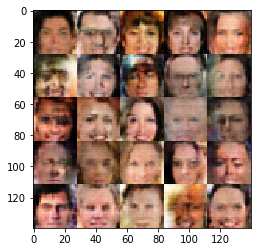

Epoch 1/1... Discriminator Loss: 0.7408... Generator Loss: 1.1924
Epoch 1/1... Discriminator Loss: 1.0142... Generator Loss: 0.6511
Epoch 1/1... Discriminator Loss: 1.0004... Generator Loss: 0.7461
Epoch 1/1... Discriminator Loss: 0.9009... Generator Loss: 0.8282
Epoch 1/1... Discriminator Loss: 0.9333... Generator Loss: 0.8423
Epoch 1/1... Discriminator Loss: 1.3829... Generator Loss: 0.7618
Epoch 1/1... Discriminator Loss: 0.9774... Generator Loss: 1.6461
Epoch 1/1... Discriminator Loss: 0.8359... Generator Loss: 0.9192
Epoch 1/1... Discriminator Loss: 0.8461... Generator Loss: 1.5794
Epoch 1/1... Discriminator Loss: 1.0334... Generator Loss: 0.8855


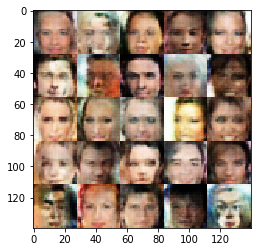

Epoch 1/1... Discriminator Loss: 1.2737... Generator Loss: 0.6839
Epoch 1/1... Discriminator Loss: 0.9364... Generator Loss: 1.0925
Epoch 1/1... Discriminator Loss: 0.8349... Generator Loss: 0.9070
Epoch 1/1... Discriminator Loss: 0.9410... Generator Loss: 0.8911
Epoch 1/1... Discriminator Loss: 1.0702... Generator Loss: 0.8115
Epoch 1/1... Discriminator Loss: 0.9987... Generator Loss: 0.9406
Epoch 1/1... Discriminator Loss: 0.9869... Generator Loss: 0.7037
Epoch 1/1... Discriminator Loss: 0.8045... Generator Loss: 1.1169
Epoch 1/1... Discriminator Loss: 1.1875... Generator Loss: 0.4946
Epoch 1/1... Discriminator Loss: 0.6606... Generator Loss: 1.4352


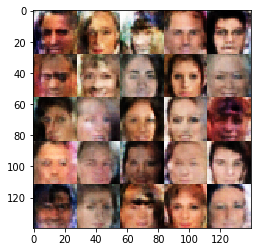

Epoch 1/1... Discriminator Loss: 0.7695... Generator Loss: 1.0182
Epoch 1/1... Discriminator Loss: 0.8102... Generator Loss: 0.8405
Epoch 1/1... Discriminator Loss: 1.1250... Generator Loss: 0.5189
Epoch 1/1... Discriminator Loss: 1.5756... Generator Loss: 0.2915
Epoch 1/1... Discriminator Loss: 0.7622... Generator Loss: 1.2480
Epoch 1/1... Discriminator Loss: 1.1494... Generator Loss: 0.5788
Epoch 1/1... Discriminator Loss: 0.9158... Generator Loss: 0.9746
Epoch 1/1... Discriminator Loss: 0.7257... Generator Loss: 0.9490
Epoch 1/1... Discriminator Loss: 1.0607... Generator Loss: 0.8822
Epoch 1/1... Discriminator Loss: 0.8924... Generator Loss: 0.9505


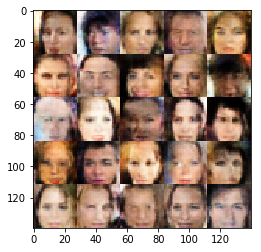

Epoch 1/1... Discriminator Loss: 0.5730... Generator Loss: 1.6788
Epoch 1/1... Discriminator Loss: 0.6690... Generator Loss: 1.3045
Epoch 1/1... Discriminator Loss: 1.4516... Generator Loss: 1.1062
Epoch 1/1... Discriminator Loss: 0.9537... Generator Loss: 1.0011
Epoch 1/1... Discriminator Loss: 1.2823... Generator Loss: 0.5155
Epoch 1/1... Discriminator Loss: 1.0138... Generator Loss: 1.0430
Epoch 1/1... Discriminator Loss: 1.0329... Generator Loss: 0.8070
Epoch 1/1... Discriminator Loss: 0.7319... Generator Loss: 1.1709
Epoch 1/1... Discriminator Loss: 0.9788... Generator Loss: 1.8931
Epoch 1/1... Discriminator Loss: 1.2814... Generator Loss: 0.5076


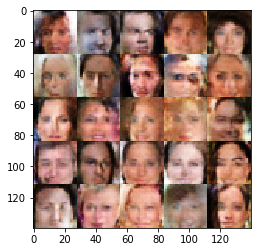

Epoch 1/1... Discriminator Loss: 0.7983... Generator Loss: 0.9101
Epoch 1/1... Discriminator Loss: 0.7928... Generator Loss: 0.9659
Epoch 1/1... Discriminator Loss: 0.9186... Generator Loss: 0.8938
Epoch 1/1... Discriminator Loss: 0.9475... Generator Loss: 0.8627
Epoch 1/1... Discriminator Loss: 1.1268... Generator Loss: 0.8786
Epoch 1/1... Discriminator Loss: 0.9553... Generator Loss: 0.9558
Epoch 1/1... Discriminator Loss: 1.0294... Generator Loss: 0.7730
Epoch 1/1... Discriminator Loss: 0.9042... Generator Loss: 1.0218
Epoch 1/1... Discriminator Loss: 0.9914... Generator Loss: 0.7554
Epoch 1/1... Discriminator Loss: 0.8920... Generator Loss: 0.8143


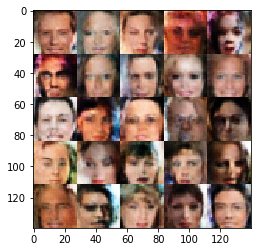

Epoch 1/1... Discriminator Loss: 0.8665... Generator Loss: 0.9334
Epoch 1/1... Discriminator Loss: 1.0728... Generator Loss: 0.8822
Epoch 1/1... Discriminator Loss: 1.3670... Generator Loss: 0.4715
Epoch 1/1... Discriminator Loss: 1.2087... Generator Loss: 1.1829
Epoch 1/1... Discriminator Loss: 0.6702... Generator Loss: 1.1083
Epoch 1/1... Discriminator Loss: 1.1485... Generator Loss: 1.1423
Epoch 1/1... Discriminator Loss: 1.3523... Generator Loss: 0.5571
Epoch 1/1... Discriminator Loss: 0.7215... Generator Loss: 1.0193
Epoch 1/1... Discriminator Loss: 0.8825... Generator Loss: 0.9270
Epoch 1/1... Discriminator Loss: 0.9657... Generator Loss: 0.6917


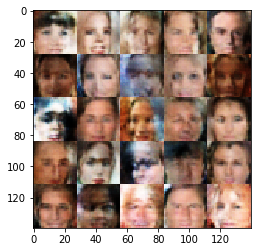

Epoch 1/1... Discriminator Loss: 1.0991... Generator Loss: 1.2228
Epoch 1/1... Discriminator Loss: 0.7596... Generator Loss: 1.4320
Epoch 1/1... Discriminator Loss: 0.9609... Generator Loss: 1.1108
Epoch 1/1... Discriminator Loss: 0.7450... Generator Loss: 1.0660
Epoch 1/1... Discriminator Loss: 0.9487... Generator Loss: 0.6984
Epoch 1/1... Discriminator Loss: 0.8790... Generator Loss: 0.9759
Epoch 1/1... Discriminator Loss: 0.9110... Generator Loss: 0.8382
Epoch 1/1... Discriminator Loss: 0.8996... Generator Loss: 1.0159
Epoch 1/1... Discriminator Loss: 1.0636... Generator Loss: 1.0965
Epoch 1/1... Discriminator Loss: 0.8567... Generator Loss: 0.9405


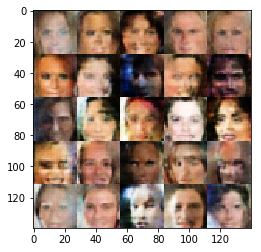

Epoch 1/1... Discriminator Loss: 0.9508... Generator Loss: 0.7920
Epoch 1/1... Discriminator Loss: 0.6862... Generator Loss: 1.0309
Epoch 1/1... Discriminator Loss: 0.6797... Generator Loss: 1.3670
Epoch 1/1... Discriminator Loss: 0.9120... Generator Loss: 1.4806
Epoch 1/1... Discriminator Loss: 0.5394... Generator Loss: 1.2069
Epoch 1/1... Discriminator Loss: 0.8734... Generator Loss: 1.4021
Epoch 1/1... Discriminator Loss: 0.8448... Generator Loss: 0.7809
Epoch 1/1... Discriminator Loss: 0.5256... Generator Loss: 1.3000
Epoch 1/1... Discriminator Loss: 0.6996... Generator Loss: 1.4369
Epoch 1/1... Discriminator Loss: 1.1325... Generator Loss: 0.6827


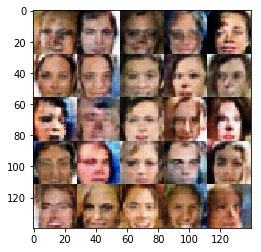

Epoch 1/1... Discriminator Loss: 0.6304... Generator Loss: 1.2688
Epoch 1/1... Discriminator Loss: 0.6337... Generator Loss: 1.2909
Epoch 1/1... Discriminator Loss: 0.8728... Generator Loss: 0.8839
Epoch 1/1... Discriminator Loss: 0.7183... Generator Loss: 1.2509
Epoch 1/1... Discriminator Loss: 0.7655... Generator Loss: 1.0821
Epoch 1/1... Discriminator Loss: 0.8360... Generator Loss: 0.8086
Epoch 1/1... Discriminator Loss: 1.1936... Generator Loss: 0.6514
Epoch 1/1... Discriminator Loss: 0.6405... Generator Loss: 1.1254
Epoch 1/1... Discriminator Loss: 0.9673... Generator Loss: 0.6931
Epoch 1/1... Discriminator Loss: 1.1796... Generator Loss: 0.5092


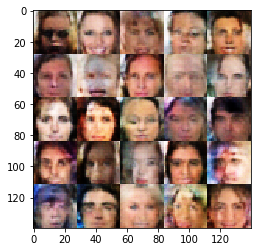

Epoch 1/1... Discriminator Loss: 1.3857... Generator Loss: 0.4447
Epoch 1/1... Discriminator Loss: 1.2493... Generator Loss: 0.4879
Epoch 1/1... Discriminator Loss: 0.8708... Generator Loss: 1.2940
Epoch 1/1... Discriminator Loss: 0.8254... Generator Loss: 0.8685
Epoch 1/1... Discriminator Loss: 0.8199... Generator Loss: 1.0488
Epoch 1/1... Discriminator Loss: 0.5068... Generator Loss: 1.5504
Epoch 1/1... Discriminator Loss: 0.7222... Generator Loss: 0.9092
Epoch 1/1... Discriminator Loss: 0.7385... Generator Loss: 1.2223
Epoch 1/1... Discriminator Loss: 1.4315... Generator Loss: 0.4262
Epoch 1/1... Discriminator Loss: 1.2554... Generator Loss: 0.4853


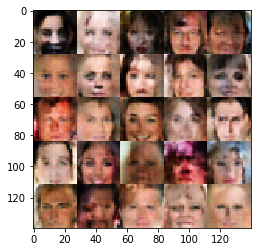

Epoch 1/1... Discriminator Loss: 0.7079... Generator Loss: 1.2874
Epoch 1/1... Discriminator Loss: 0.5885... Generator Loss: 1.4142
Epoch 1/1... Discriminator Loss: 1.0241... Generator Loss: 0.9078
Epoch 1/1... Discriminator Loss: 0.6995... Generator Loss: 1.2508
Epoch 1/1... Discriminator Loss: 0.7799... Generator Loss: 1.0633
Epoch 1/1... Discriminator Loss: 1.0388... Generator Loss: 0.7768
Epoch 1/1... Discriminator Loss: 0.8035... Generator Loss: 1.0266
Epoch 1/1... Discriminator Loss: 0.7644... Generator Loss: 0.8970
Epoch 1/1... Discriminator Loss: 0.8108... Generator Loss: 1.1000
Epoch 1/1... Discriminator Loss: 1.0339... Generator Loss: 0.6567


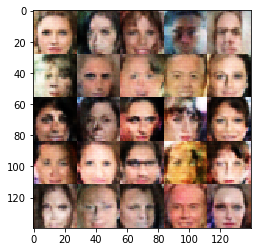

Epoch 1/1... Discriminator Loss: 0.9424... Generator Loss: 0.8134
Epoch 1/1... Discriminator Loss: 0.7688... Generator Loss: 1.1490
Epoch 1/1... Discriminator Loss: 0.7941... Generator Loss: 1.0065
Epoch 1/1... Discriminator Loss: 0.7862... Generator Loss: 1.1295
Epoch 1/1... Discriminator Loss: 1.1073... Generator Loss: 0.5235
Epoch 1/1... Discriminator Loss: 0.8757... Generator Loss: 1.5940
Epoch 1/1... Discriminator Loss: 1.2243... Generator Loss: 0.4984
Epoch 1/1... Discriminator Loss: 0.8328... Generator Loss: 1.5481
Epoch 1/1... Discriminator Loss: 0.8279... Generator Loss: 2.4388
Epoch 1/1... Discriminator Loss: 1.0257... Generator Loss: 0.8524


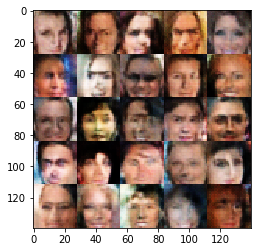

Epoch 1/1... Discriminator Loss: 0.8925... Generator Loss: 0.7849
Epoch 1/1... Discriminator Loss: 0.9223... Generator Loss: 0.7731
Epoch 1/1... Discriminator Loss: 0.7338... Generator Loss: 0.9815
Epoch 1/1... Discriminator Loss: 0.6823... Generator Loss: 1.0821
Epoch 1/1... Discriminator Loss: 1.1490... Generator Loss: 0.5346
Epoch 1/1... Discriminator Loss: 0.9489... Generator Loss: 0.8401
Epoch 1/1... Discriminator Loss: 1.1882... Generator Loss: 0.6406
Epoch 1/1... Discriminator Loss: 0.7974... Generator Loss: 1.0644
Epoch 1/1... Discriminator Loss: 0.9747... Generator Loss: 1.5963
Epoch 1/1... Discriminator Loss: 1.2658... Generator Loss: 0.4787


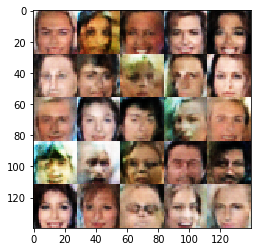

Epoch 1/1... Discriminator Loss: 0.5723... Generator Loss: 1.3963
Epoch 1/1... Discriminator Loss: 0.7731... Generator Loss: 0.9311
Epoch 1/1... Discriminator Loss: 0.8916... Generator Loss: 0.9555
Epoch 1/1... Discriminator Loss: 0.5209... Generator Loss: 1.7467
Epoch 1/1... Discriminator Loss: 1.2679... Generator Loss: 1.3323
Epoch 1/1... Discriminator Loss: 1.2813... Generator Loss: 0.4768
Epoch 1/1... Discriminator Loss: 1.3768... Generator Loss: 0.4740
Epoch 1/1... Discriminator Loss: 1.0471... Generator Loss: 1.1036
Epoch 1/1... Discriminator Loss: 0.7383... Generator Loss: 1.7806
Epoch 1/1... Discriminator Loss: 0.8605... Generator Loss: 0.9807


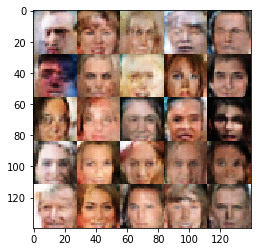

Epoch 1/1... Discriminator Loss: 0.8420... Generator Loss: 0.7926
Epoch 1/1... Discriminator Loss: 1.0887... Generator Loss: 0.5990
Epoch 1/1... Discriminator Loss: 0.6301... Generator Loss: 1.4102
Epoch 1/1... Discriminator Loss: 1.0813... Generator Loss: 0.6736
Epoch 1/1... Discriminator Loss: 0.6222... Generator Loss: 1.0493
Epoch 1/1... Discriminator Loss: 0.7417... Generator Loss: 1.0438
Epoch 1/1... Discriminator Loss: 0.7206... Generator Loss: 1.1497
Epoch 1/1... Discriminator Loss: 0.7686... Generator Loss: 0.9626
Epoch 1/1... Discriminator Loss: 0.7357... Generator Loss: 1.1370
Epoch 1/1... Discriminator Loss: 0.9816... Generator Loss: 1.8953


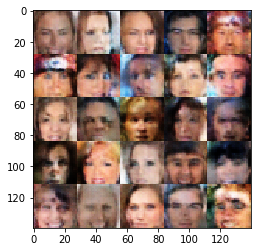

Epoch 1/1... Discriminator Loss: 1.0873... Generator Loss: 0.7740
Epoch 1/1... Discriminator Loss: 0.7360... Generator Loss: 1.1939
Epoch 1/1... Discriminator Loss: 0.9443... Generator Loss: 0.7648
Epoch 1/1... Discriminator Loss: 0.8726... Generator Loss: 1.2242
Epoch 1/1... Discriminator Loss: 0.6727... Generator Loss: 1.2115
Epoch 1/1... Discriminator Loss: 0.7364... Generator Loss: 1.0807
Epoch 1/1... Discriminator Loss: 1.0903... Generator Loss: 0.7926
Epoch 1/1... Discriminator Loss: 0.8848... Generator Loss: 0.8676
Epoch 1/1... Discriminator Loss: 1.0834... Generator Loss: 0.6649
Epoch 1/1... Discriminator Loss: 0.7938... Generator Loss: 1.2313


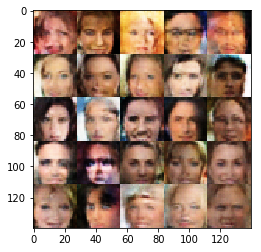

Epoch 1/1... Discriminator Loss: 0.7778... Generator Loss: 0.9397
Epoch 1/1... Discriminator Loss: 0.8374... Generator Loss: 1.0573
Epoch 1/1... Discriminator Loss: 0.7596... Generator Loss: 1.2297
Epoch 1/1... Discriminator Loss: 0.7200... Generator Loss: 1.4141
Epoch 1/1... Discriminator Loss: 0.6966... Generator Loss: 1.3203
Epoch 1/1... Discriminator Loss: 1.0346... Generator Loss: 0.6470
Epoch 1/1... Discriminator Loss: 0.8960... Generator Loss: 0.6913
Epoch 1/1... Discriminator Loss: 1.0485... Generator Loss: 0.8271
Epoch 1/1... Discriminator Loss: 0.4858... Generator Loss: 1.9837
Epoch 1/1... Discriminator Loss: 1.0274... Generator Loss: 1.2268


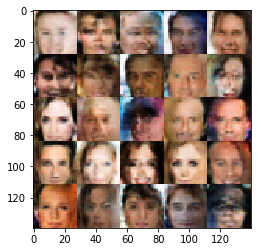

Epoch 1/1... Discriminator Loss: 1.2004... Generator Loss: 1.3152
Epoch 1/1... Discriminator Loss: 0.9096... Generator Loss: 0.8503
Epoch 1/1... Discriminator Loss: 0.5765... Generator Loss: 1.3017
Epoch 1/1... Discriminator Loss: 1.0649... Generator Loss: 1.2634
Epoch 1/1... Discriminator Loss: 1.0973... Generator Loss: 0.5596
Epoch 1/1... Discriminator Loss: 0.7886... Generator Loss: 1.0950
Epoch 1/1... Discriminator Loss: 0.7443... Generator Loss: 1.5497
Epoch 1/1... Discriminator Loss: 0.9122... Generator Loss: 1.3741
Epoch 1/1... Discriminator Loss: 1.0109... Generator Loss: 0.7160
Epoch 1/1... Discriminator Loss: 0.8189... Generator Loss: 1.8864


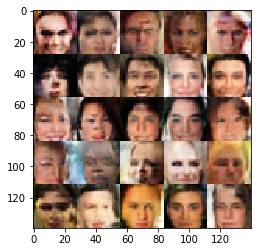

Epoch 1/1... Discriminator Loss: 0.8823... Generator Loss: 1.2981
Epoch 1/1... Discriminator Loss: 0.7860... Generator Loss: 1.2485
Epoch 1/1... Discriminator Loss: 1.2300... Generator Loss: 0.5440
Epoch 1/1... Discriminator Loss: 0.6637... Generator Loss: 1.0764
Epoch 1/1... Discriminator Loss: 0.5815... Generator Loss: 1.2037
Epoch 1/1... Discriminator Loss: 0.8445... Generator Loss: 1.0045
Epoch 1/1... Discriminator Loss: 1.0451... Generator Loss: 0.7277
Epoch 1/1... Discriminator Loss: 0.6755... Generator Loss: 1.5316
Epoch 1/1... Discriminator Loss: 0.8881... Generator Loss: 0.7682
Epoch 1/1... Discriminator Loss: 0.7171... Generator Loss: 1.4451


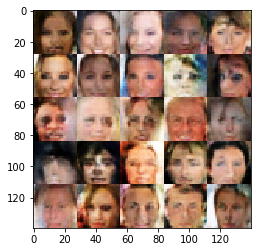

Epoch 1/1... Discriminator Loss: 0.6179... Generator Loss: 1.3199
Epoch 1/1... Discriminator Loss: 0.5927... Generator Loss: 1.3080
Epoch 1/1... Discriminator Loss: 1.0705... Generator Loss: 0.6379
Epoch 1/1... Discriminator Loss: 1.1456... Generator Loss: 1.7983
Epoch 1/1... Discriminator Loss: 0.7837... Generator Loss: 1.3408
Epoch 1/1... Discriminator Loss: 0.5608... Generator Loss: 1.1698
Epoch 1/1... Discriminator Loss: 0.9041... Generator Loss: 0.7070
Epoch 1/1... Discriminator Loss: 0.9824... Generator Loss: 0.9243
Epoch 1/1... Discriminator Loss: 0.6919... Generator Loss: 1.4092
Epoch 1/1... Discriminator Loss: 0.7016... Generator Loss: 0.9050


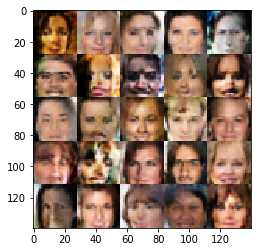

Epoch 1/1... Discriminator Loss: 0.7888... Generator Loss: 0.9958
Epoch 1/1... Discriminator Loss: 0.7337... Generator Loss: 1.1016
Epoch 1/1... Discriminator Loss: 0.8506... Generator Loss: 1.1202
Epoch 1/1... Discriminator Loss: 0.9969... Generator Loss: 1.2060
Epoch 1/1... Discriminator Loss: 0.3416... Generator Loss: 2.5576
Epoch 1/1... Discriminator Loss: 0.7235... Generator Loss: 1.1983
Epoch 1/1... Discriminator Loss: 0.7727... Generator Loss: 1.0125
Epoch 1/1... Discriminator Loss: 1.0247... Generator Loss: 0.6945
Epoch 1/1... Discriminator Loss: 0.9351... Generator Loss: 0.8778
Epoch 1/1... Discriminator Loss: 1.0326... Generator Loss: 0.6742


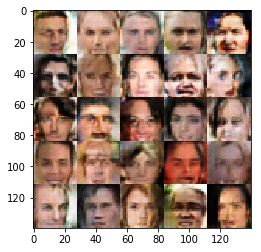

Epoch 1/1... Discriminator Loss: 0.6517... Generator Loss: 1.3414
Epoch 1/1... Discriminator Loss: 0.7587... Generator Loss: 1.0493
Epoch 1/1... Discriminator Loss: 0.9135... Generator Loss: 0.9833
Epoch 1/1... Discriminator Loss: 0.6118... Generator Loss: 1.3452
Epoch 1/1... Discriminator Loss: 0.8151... Generator Loss: 0.9670
Epoch 1/1... Discriminator Loss: 1.4068... Generator Loss: 0.3570
Epoch 1/1... Discriminator Loss: 0.9626... Generator Loss: 0.7192
Epoch 1/1... Discriminator Loss: 1.0582... Generator Loss: 0.8641
Epoch 1/1... Discriminator Loss: 1.1893... Generator Loss: 0.7046
Epoch 1/1... Discriminator Loss: 0.8620... Generator Loss: 0.8445


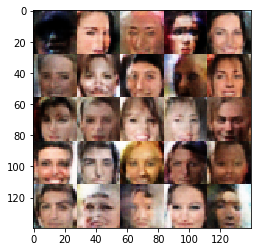

Epoch 1/1... Discriminator Loss: 0.4387... Generator Loss: 1.5213
Epoch 1/1... Discriminator Loss: 0.7479... Generator Loss: 1.4180
Epoch 1/1... Discriminator Loss: 0.5290... Generator Loss: 1.8760
Epoch 1/1... Discriminator Loss: 0.5960... Generator Loss: 1.3967
Epoch 1/1... Discriminator Loss: 0.9250... Generator Loss: 1.7404
Epoch 1/1... Discriminator Loss: 0.9759... Generator Loss: 0.9681
Epoch 1/1... Discriminator Loss: 0.5342... Generator Loss: 1.5467
Epoch 1/1... Discriminator Loss: 0.7553... Generator Loss: 1.0956
Epoch 1/1... Discriminator Loss: 1.2477... Generator Loss: 0.5902
Epoch 1/1... Discriminator Loss: 0.8767... Generator Loss: 0.9641


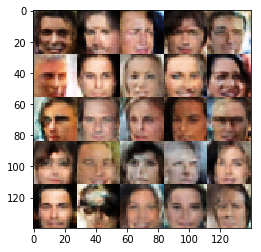

Epoch 1/1... Discriminator Loss: 0.9869... Generator Loss: 0.6603
Epoch 1/1... Discriminator Loss: 0.7497... Generator Loss: 1.2894
Epoch 1/1... Discriminator Loss: 0.6443... Generator Loss: 1.1043
Epoch 1/1... Discriminator Loss: 0.7402... Generator Loss: 1.3717
Epoch 1/1... Discriminator Loss: 0.5931... Generator Loss: 1.2132
Epoch 1/1... Discriminator Loss: 1.1667... Generator Loss: 0.8339
Epoch 1/1... Discriminator Loss: 0.4889... Generator Loss: 1.5852
Epoch 1/1... Discriminator Loss: 0.4922... Generator Loss: 1.8183
Epoch 1/1... Discriminator Loss: 0.5621... Generator Loss: 1.4790
Epoch 1/1... Discriminator Loss: 0.3299... Generator Loss: 2.4118


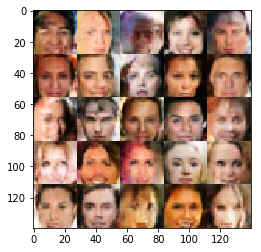

Epoch 1/1... Discriminator Loss: 0.5881... Generator Loss: 1.2945
Epoch 1/1... Discriminator Loss: 0.9209... Generator Loss: 0.8657
Epoch 1/1... Discriminator Loss: 0.5309... Generator Loss: 1.3748
Epoch 1/1... Discriminator Loss: 1.0958... Generator Loss: 0.6873
Epoch 1/1... Discriminator Loss: 0.6993... Generator Loss: 1.4667
Epoch 1/1... Discriminator Loss: 0.7525... Generator Loss: 1.1047
Epoch 1/1... Discriminator Loss: 0.6335... Generator Loss: 1.7113
Epoch 1/1... Discriminator Loss: 1.0286... Generator Loss: 0.6589
Epoch 1/1... Discriminator Loss: 0.9511... Generator Loss: 0.8615
Epoch 1/1... Discriminator Loss: 0.4246... Generator Loss: 2.3067


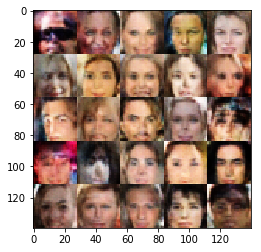

Epoch 1/1... Discriminator Loss: 0.8404... Generator Loss: 0.7684
Epoch 1/1... Discriminator Loss: 0.8382... Generator Loss: 1.0151
Epoch 1/1... Discriminator Loss: 0.9975... Generator Loss: 0.7095
Epoch 1/1... Discriminator Loss: 0.7074... Generator Loss: 1.5191
Epoch 1/1... Discriminator Loss: 0.6414... Generator Loss: 1.1876
Epoch 1/1... Discriminator Loss: 0.6615... Generator Loss: 1.0000
Epoch 1/1... Discriminator Loss: 0.9126... Generator Loss: 1.0985
Epoch 1/1... Discriminator Loss: 0.7021... Generator Loss: 1.0646
Epoch 1/1... Discriminator Loss: 0.7487... Generator Loss: 1.4549
Epoch 1/1... Discriminator Loss: 1.1912... Generator Loss: 0.4658


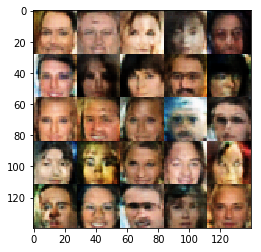

Epoch 1/1... Discriminator Loss: 0.8340... Generator Loss: 0.7456
Epoch 1/1... Discriminator Loss: 0.8517... Generator Loss: 0.9416
Epoch 1/1... Discriminator Loss: 0.7181... Generator Loss: 1.2050
Epoch 1/1... Discriminator Loss: 0.7944... Generator Loss: 1.3577
Epoch 1/1... Discriminator Loss: 0.8785... Generator Loss: 0.7766
Epoch 1/1... Discriminator Loss: 0.9547... Generator Loss: 0.6887
Epoch 1/1... Discriminator Loss: 1.2375... Generator Loss: 0.4812
Epoch 1/1... Discriminator Loss: 0.4271... Generator Loss: 1.6478
Epoch 1/1... Discriminator Loss: 0.7158... Generator Loss: 0.9340
Epoch 1/1... Discriminator Loss: 1.0407... Generator Loss: 0.7254


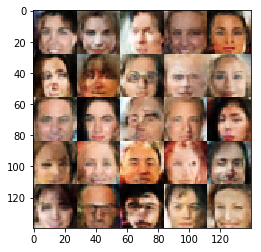

Epoch 1/1... Discriminator Loss: 0.8714... Generator Loss: 2.1504
Epoch 1/1... Discriminator Loss: 0.6177... Generator Loss: 1.5233
Epoch 1/1... Discriminator Loss: 0.6453... Generator Loss: 1.7281
Epoch 1/1... Discriminator Loss: 0.4943... Generator Loss: 1.7053
Epoch 1/1... Discriminator Loss: 0.6396... Generator Loss: 1.4320
Epoch 1/1... Discriminator Loss: 0.5621... Generator Loss: 1.9372
Epoch 1/1... Discriminator Loss: 0.6603... Generator Loss: 1.2084
Epoch 1/1... Discriminator Loss: 0.5700... Generator Loss: 1.4013
Epoch 1/1... Discriminator Loss: 0.1254... Generator Loss: 4.0092
Epoch 1/1... Discriminator Loss: 0.3556... Generator Loss: 1.8569


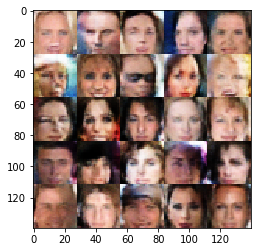

Epoch 1/1... Discriminator Loss: 0.9097... Generator Loss: 0.7132
Epoch 1/1... Discriminator Loss: 0.7316... Generator Loss: 0.9618
Epoch 1/1... Discriminator Loss: 1.3875... Generator Loss: 0.4475
Epoch 1/1... Discriminator Loss: 0.4669... Generator Loss: 1.4348
Epoch 1/1... Discriminator Loss: 0.5115... Generator Loss: 1.2815
Epoch 1/1... Discriminator Loss: 0.4515... Generator Loss: 1.5238
Epoch 1/1... Discriminator Loss: 0.7427... Generator Loss: 1.1537
Epoch 1/1... Discriminator Loss: 1.5338... Generator Loss: 0.3628
Epoch 1/1... Discriminator Loss: 1.6491... Generator Loss: 0.2997
Epoch 1/1... Discriminator Loss: 0.7353... Generator Loss: 1.1960


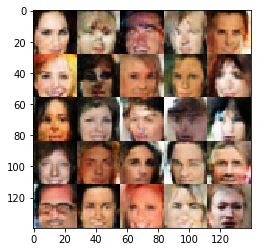

Epoch 1/1... Discriminator Loss: 1.2398... Generator Loss: 0.4774
Epoch 1/1... Discriminator Loss: 0.8305... Generator Loss: 3.3377
Epoch 1/1... Discriminator Loss: 1.0139... Generator Loss: 0.6149
Epoch 1/1... Discriminator Loss: 1.3160... Generator Loss: 0.4641
Epoch 1/1... Discriminator Loss: 0.2644... Generator Loss: 2.0241
Epoch 1/1... Discriminator Loss: 0.3763... Generator Loss: 3.5081
Epoch 1/1... Discriminator Loss: 0.5443... Generator Loss: 1.6806
Epoch 1/1... Discriminator Loss: 0.2952... Generator Loss: 2.4064
Epoch 1/1... Discriminator Loss: 0.7053... Generator Loss: 1.1847
Epoch 1/1... Discriminator Loss: 0.2449... Generator Loss: 2.7623


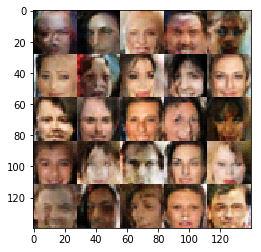

Epoch 1/1... Discriminator Loss: 0.2123... Generator Loss: 3.2685
Epoch 1/1... Discriminator Loss: 0.4233... Generator Loss: 4.2559
Epoch 1/1... Discriminator Loss: 0.7166... Generator Loss: 1.0012
Epoch 1/1... Discriminator Loss: 0.2764... Generator Loss: 3.2260
Epoch 1/1... Discriminator Loss: 0.2937... Generator Loss: 2.4561
Epoch 1/1... Discriminator Loss: 0.8559... Generator Loss: 0.8289
Epoch 1/1... Discriminator Loss: 0.1702... Generator Loss: 3.0658
Epoch 1/1... Discriminator Loss: 0.6153... Generator Loss: 1.9727
Epoch 1/1... Discriminator Loss: 1.2990... Generator Loss: 0.4652
Epoch 1/1... Discriminator Loss: 0.3933... Generator Loss: 1.6910


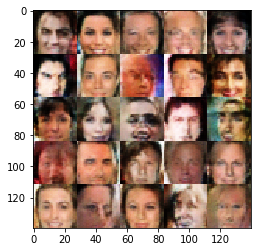

Epoch 1/1... Discriminator Loss: 0.3424... Generator Loss: 2.2586
Epoch 1/1... Discriminator Loss: 0.2091... Generator Loss: 2.2272
Epoch 1/1... Discriminator Loss: 0.4167... Generator Loss: 1.5996
Epoch 1/1... Discriminator Loss: 1.5746... Generator Loss: 0.3207
Epoch 1/1... Discriminator Loss: 0.5523... Generator Loss: 1.3447
Epoch 1/1... Discriminator Loss: 0.9832... Generator Loss: 0.6636
Epoch 1/1... Discriminator Loss: 0.2652... Generator Loss: 3.3112
Epoch 1/1... Discriminator Loss: 0.1041... Generator Loss: 3.4280
Epoch 1/1... Discriminator Loss: 0.3295... Generator Loss: 3.2991
Epoch 1/1... Discriminator Loss: 1.6140... Generator Loss: 0.2925


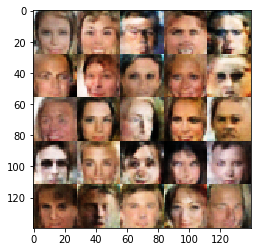

Epoch 1/1... Discriminator Loss: 0.3070... Generator Loss: 3.6036
Epoch 1/1... Discriminator Loss: 1.2875... Generator Loss: 0.4547
Epoch 1/1... Discriminator Loss: 0.5139... Generator Loss: 5.9926
Epoch 1/1... Discriminator Loss: 1.5853... Generator Loss: 0.3597
Epoch 1/1... Discriminator Loss: 0.4318... Generator Loss: 1.3520
Epoch 1/1... Discriminator Loss: 0.7278... Generator Loss: 1.0086
Epoch 1/1... Discriminator Loss: 0.5131... Generator Loss: 1.4281
Epoch 1/1... Discriminator Loss: 0.9662... Generator Loss: 0.7884
Epoch 1/1... Discriminator Loss: 0.7618... Generator Loss: 0.8511
Epoch 1/1... Discriminator Loss: 0.5430... Generator Loss: 1.2132


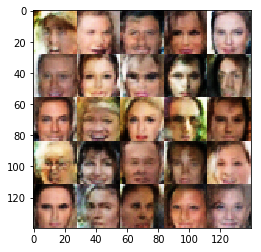

Epoch 1/1... Discriminator Loss: 0.7724... Generator Loss: 0.8898
Epoch 1/1... Discriminator Loss: 0.1729... Generator Loss: 3.9577
Epoch 1/1... Discriminator Loss: 0.5637... Generator Loss: 1.3808
Epoch 1/1... Discriminator Loss: 0.5392... Generator Loss: 1.3920
Epoch 1/1... Discriminator Loss: 0.7685... Generator Loss: 1.9848
Epoch 1/1... Discriminator Loss: 0.2663... Generator Loss: 1.8904
Epoch 1/1... Discriminator Loss: 0.2162... Generator Loss: 2.0352
Epoch 1/1... Discriminator Loss: 0.5342... Generator Loss: 1.1875
Epoch 1/1... Discriminator Loss: 0.3163... Generator Loss: 1.9977
Epoch 1/1... Discriminator Loss: 0.3815... Generator Loss: 1.5987


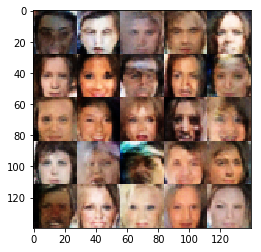

Epoch 1/1... Discriminator Loss: 0.5927... Generator Loss: 1.1566
Epoch 1/1... Discriminator Loss: 1.9762... Generator Loss: 0.2192
Epoch 1/1... Discriminator Loss: 0.5132... Generator Loss: 1.3837
Epoch 1/1... Discriminator Loss: 0.1271... Generator Loss: 3.1811
Epoch 1/1... Discriminator Loss: 0.2925... Generator Loss: 2.9137
Epoch 1/1... Discriminator Loss: 0.3220... Generator Loss: 2.6492
Epoch 1/1... Discriminator Loss: 0.1492... Generator Loss: 2.9250
Epoch 1/1... Discriminator Loss: 1.7185... Generator Loss: 0.3066
Epoch 1/1... Discriminator Loss: 1.4476... Generator Loss: 0.3776
Epoch 1/1... Discriminator Loss: 0.2037... Generator Loss: 3.2548


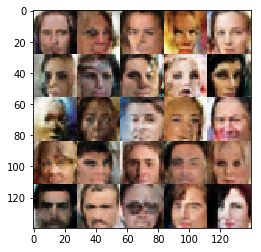

Epoch 1/1... Discriminator Loss: 0.8276... Generator Loss: 2.9449
Epoch 1/1... Discriminator Loss: 0.0968... Generator Loss: 2.9897
Epoch 1/1... Discriminator Loss: 0.3335... Generator Loss: 1.6688
Epoch 1/1... Discriminator Loss: 0.5852... Generator Loss: 1.1512
Epoch 1/1... Discriminator Loss: 0.6340... Generator Loss: 0.9852
Epoch 1/1... Discriminator Loss: 0.4865... Generator Loss: 1.4065
Epoch 1/1... Discriminator Loss: 0.1574... Generator Loss: 3.4660
Epoch 1/1... Discriminator Loss: 0.2536... Generator Loss: 6.4218
Epoch 1/1... Discriminator Loss: 0.1341... Generator Loss: 3.1599
Epoch 1/1... Discriminator Loss: 0.0512... Generator Loss: 6.1407


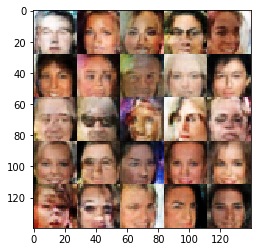

Epoch 1/1... Discriminator Loss: 0.1339... Generator Loss: 3.2437
Epoch 1/1... Discriminator Loss: 0.0852... Generator Loss: 3.9288
Epoch 1/1... Discriminator Loss: 0.2501... Generator Loss: 3.6248
Epoch 1/1... Discriminator Loss: 0.6165... Generator Loss: 2.5175
Epoch 1/1... Discriminator Loss: 0.4088... Generator Loss: 3.2212
Epoch 1/1... Discriminator Loss: 0.4195... Generator Loss: 1.5179
Epoch 1/1... Discriminator Loss: 0.1398... Generator Loss: 3.3327
Epoch 1/1... Discriminator Loss: 0.2950... Generator Loss: 2.1641
Epoch 1/1... Discriminator Loss: 0.2550... Generator Loss: 4.2479
Epoch 1/1... Discriminator Loss: 0.2352... Generator Loss: 5.1800


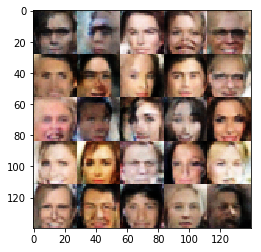

Epoch 1/1... Discriminator Loss: 0.1597... Generator Loss: 2.6720
Epoch 1/1... Discriminator Loss: 0.1561... Generator Loss: 4.7529
Epoch 1/1... Discriminator Loss: 0.2031... Generator Loss: 2.3897
Epoch 1/1... Discriminator Loss: 0.1100... Generator Loss: 2.8378
Epoch 1/1... Discriminator Loss: 0.1271... Generator Loss: 5.0959
Epoch 1/1... Discriminator Loss: 0.1950... Generator Loss: 2.2848
Epoch 1/1... Discriminator Loss: 1.0284... Generator Loss: 0.6373
Epoch 1/1... Discriminator Loss: 0.6786... Generator Loss: 2.5349
Epoch 1/1... Discriminator Loss: 0.7390... Generator Loss: 0.8713
Epoch 1/1... Discriminator Loss: 0.6818... Generator Loss: 0.9268


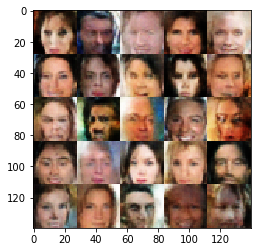

Epoch 1/1... Discriminator Loss: 0.3078... Generator Loss: 3.0747
Epoch 1/1... Discriminator Loss: 0.3760... Generator Loss: 1.5181
Epoch 1/1... Discriminator Loss: 0.4171... Generator Loss: 1.3900
Epoch 1/1... Discriminator Loss: 0.0544... Generator Loss: 3.7577
Epoch 1/1... Discriminator Loss: 1.3609... Generator Loss: 0.7602
Epoch 1/1... Discriminator Loss: 0.3652... Generator Loss: 1.7003
Epoch 1/1... Discriminator Loss: 0.5964... Generator Loss: 1.2371
Epoch 1/1... Discriminator Loss: 0.4222... Generator Loss: 1.8817
Epoch 1/1... Discriminator Loss: 0.4667... Generator Loss: 1.3015
Epoch 1/1... Discriminator Loss: 1.2433... Generator Loss: 0.4971


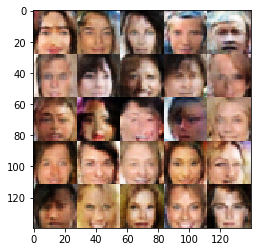

Epoch 1/1... Discriminator Loss: 0.4624... Generator Loss: 1.4213
Epoch 1/1... Discriminator Loss: 0.7442... Generator Loss: 0.8240
Epoch 1/1... Discriminator Loss: 0.1506... Generator Loss: 2.9562
Epoch 1/1... Discriminator Loss: 0.1084... Generator Loss: 3.2669
Epoch 1/1... Discriminator Loss: 0.0611... Generator Loss: 6.6285
Epoch 1/1... Discriminator Loss: 0.0938... Generator Loss: 5.0146
Epoch 1/1... Discriminator Loss: 0.8409... Generator Loss: 0.7761
Epoch 1/1... Discriminator Loss: 0.1555... Generator Loss: 2.6107
Epoch 1/1... Discriminator Loss: 0.0726... Generator Loss: 3.8162
Epoch 1/1... Discriminator Loss: 0.0481... Generator Loss: 6.6564


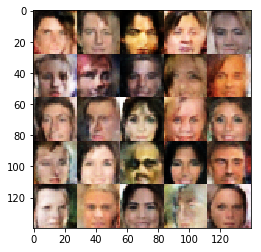

Epoch 1/1... Discriminator Loss: 0.2641... Generator Loss: 2.2156
Epoch 1/1... Discriminator Loss: 0.1035... Generator Loss: 3.4555
Epoch 1/1... Discriminator Loss: 0.1041... Generator Loss: 4.8590
Epoch 1/1... Discriminator Loss: 0.1388... Generator Loss: 2.6909
Epoch 1/1... Discriminator Loss: 0.1965... Generator Loss: 4.6183
Epoch 1/1... Discriminator Loss: 0.0672... Generator Loss: 4.2700
Epoch 1/1... Discriminator Loss: 0.5069... Generator Loss: 1.4688
Epoch 1/1... Discriminator Loss: 0.0641... Generator Loss: 4.8586
Epoch 1/1... Discriminator Loss: 0.5008... Generator Loss: 1.2713
Epoch 1/1... Discriminator Loss: 0.5807... Generator Loss: 1.1636


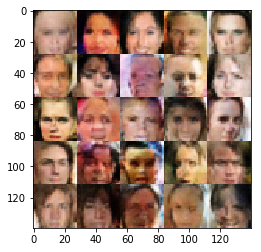

Epoch 1/1... Discriminator Loss: 0.5626... Generator Loss: 0.9586
Epoch 1/1... Discriminator Loss: 2.5242... Generator Loss: 0.1188
Epoch 1/1... Discriminator Loss: 0.2137... Generator Loss: 2.9424


In [29]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.6


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.